### ~操作符用于翻转布尔型np.array值

In [1]:
import numpy as np
a = np.array([True, False])
~a #翻转

array([False,  True])

### 花式索引（Fancy indexing）
#### 指的是利用整数数组进行索引

In [2]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [12]:
arr[[0,2,4]] # 选取第1,3,5行
# arr[[1,3],[2,3]）  选取第2行第4个 及 第4行第4个

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19]])

#### 数组花式索引 产生的是一个副本，而数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上

In [13]:
'''
当交换一个数组的行列时应特别注意
'''
b = np.array([[1, 2], [3, 4]])
b[[0,1], :] = b[[1,0], :]  # 花式索引产生的副本，b[0,:],b[1,:] = b[1,:],b[0,:]并没交换两行，可以用copy获取切片的副本以交换，改写为
                          # b[0,:],b[1,:] = b[1,:].copy(),b[0,:].copy()
b

array([[3, 4],
       [1, 2]])

### 数组转置和轴对换

#### 实际上是对索引轴的转换

In [22]:
arr = np.arange(15).reshape((3, 5)) # 
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [23]:
arr.T # 二维数组转置   

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [17]:
arr.transpose((1,0))  # 0,1 轴 变为 1,0 轴  

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [18]:
arr.swapaxes(0,1) # 轴对换

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### 通用函数

#### 通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数
#### 一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc）

In [24]:
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [25]:
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y)  # 返回x，y中元素级别的最大值

array([-0.71585195,  1.03128659,  0.40059554,  0.22090915, -0.09458734,
       -0.19728837,  1.31212807, -1.09930368])

In [27]:
c = np.random.randn(5)*6
whole, remainder = np.modf(c) 返回浮点数的整数部分和小数部分
print(whole, remainder)

[-0.24911686 -0.68971311 -0.14404831  0.48114124  0.87589969] [-4. -4. -8.  3.  0.]


### np.meshgid 生成网格点坐标矩阵

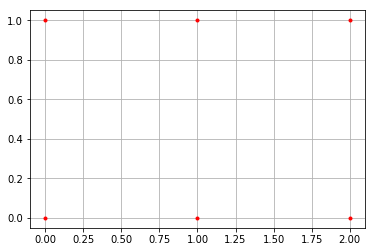

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.array([0, 1, 2]) # x坐标
y = np.array([0, 1])    # y坐标

X, Y = np.meshgrid(x, y) #网格化
plt.plot(X, Y,
         color='red',  # 全部点设置为红色
         marker='.',  # 点的形状为圆点
         linestyle='')  # 线型为空，也即点与点之间不用线连接
plt.grid(True)
plt.show()

### numpy.where函数是三元表达式x if condition else y的矢量化版本

In [30]:
arr = np.random.randn(4, 4)
arr

array([[ 0.52175509, -1.4407146 , -0.05167745, -0.91502259],
       [ 0.33120415,  0.39364732,  0.84661282,  1.27077231],
       [-0.2269742 , -0.11443896, -0.67617061,  0.45241485],
       [-0.19185769, -0.42556739, -0.42136221, -1.90355461]])

In [31]:
np.where(arr < 0, 2, -2) # 小于0替换为2，大于0替换为-2

array([[-2,  2,  2,  2],
       [-2, -2, -2, -2],
       [ 2,  2,  2, -2],
       [ 2,  2,  2,  2]])

In [33]:
np.where(arr > 0, 2, arr) # 大于0替换2，小于0不替换

array([[ 2.        , -1.4407146 , -0.05167745, -0.91502259],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.2269742 , -0.11443896, -0.67617061,  2.        ],
       [-0.19185769, -0.42556739, -0.42136221, -1.90355461]])

### 数组的数学和统计方法

#### 可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算，sum、mean以及标准差std等聚合计算（aggregation）既可以当做数组的实例方法调用，也可以当做NumPy函数使用

In [34]:
arr = np.random.randn(5, 4)
arr

array([[-1.258622  , -0.8745204 , -0.56348585,  1.09906635],
       [ 1.40985081,  1.44442806, -0.64800491, -0.78089683],
       [-0.03380354,  1.48530589, -0.13487838,  1.11553453],
       [-1.50175246,  0.45166913, -0.33702175,  1.63491408],
       [ 0.68359795, -0.65245412,  0.8010182 ,  0.11112217]])

In [35]:
arr.sum() # 等同于 np.sum(arr)
np.mean(arr,axis=0) # 返回各列的均值
np.cumsum() # 累计和
np.cumprod()
np.std() # 自由度可调，默认为n
np.var()# 自由度可调，默认为n
np.max()  np.argmax()
np.min() np.argmin()

3.4510669255396857

### 计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值

In [36]:
arr = np.random.randn(1000)
arr.sort()
q = arr[int(0.05*len(arr))] # 计算5%分位数
q

-1.625619716934896

### 唯一化以及其它的集合逻辑

In [37]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names) # 找出数组中的唯一值并返回已排序的结果

np.intersect1d(x ,y) # 计算交集并返回有序结果
np.union(x, y)  # 计算并集并返回有序结果
np.in1d(x,y)   # 得到一个 x的元素是否包含于y 的布尔型数组
setdiff1d(x,y) # 得到差集

array(['Bob', 'Joe', 'Will'], dtype='<U4')

### 线性代数

In [39]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
np.dot(x, y)  # 矩阵乘法的3种表示
x.dot(y)
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [43]:
from numpy.linalg import inv  # etc
X = np.random.randn(5, 5) # 指定数组形状无需tuple
mat = X.T.dot(X)
print(inv(mat),'\n'*2, np.dot(inv(mat), mat))

diag  # 以一维数组的形式返回方阵的对角线（或非对角线）元素;或将一维数组转换为方阵（对角为0）
trace # 计算对角线元素的和
det   # 计算矩阵行列式
eig   # 计算方阵的本征值和本证向量
pinv  # 计算矩阵的Moore-Penrose伪逆
qr    # 计算QR分解
svd   # 计算奇异值分解（SVD）
solve # 解线性方程组
lstsq # 计算Ax = b 的最小二乘解

[[ 28.7410087   15.98734362 133.49109943   3.60863993  37.38564002]
 [ 15.98734362   9.37454616  75.87931384   1.84215315  20.80203852]
 [133.49109943  75.87931384 629.0450739   16.14634916 174.34347091]
 [  3.60863993   1.84215315  16.14634916   0.62922364   4.8554944 ]
 [ 37.38564002  20.80203852 174.34347091   4.8554944   49.56928244]] 

 [[ 1.00000000e+00 -3.29312361e-15  2.40366254e-15  1.20441539e-14
  -9.59820636e-15]
 [-8.20985494e-15  1.00000000e+00  7.42423525e-15  2.33512144e-14
  -1.02939556e-14]
 [-4.97316433e-14 -6.76275729e-14  1.00000000e+00  6.75595607e-14
  -2.09463168e-14]
 [ 9.92020088e-16 -1.12417345e-15 -4.78829660e-16  1.00000000e+00
   4.40787540e-16]
 [-1.22558267e-14  8.42160538e-15 -2.07855160e-15 -8.75566575e-15
   1.00000000e+00]]
